In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print ('OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):')
print (cv2.__version__)

OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):
3.4.2


# 1、数据导入

octo_front = cv2.imread(r'C:\Users\Tianh\Desktop\Octo_front.jpg')
octo_offset = cv2.imread(r'C:\Users\Tianh\Desktop\Octo_offset.jpg')

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

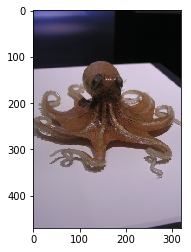

In [4]:
show_rgb_img(octo_front);

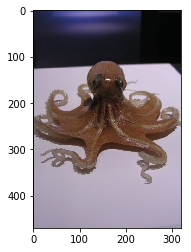

In [5]:
show_rgb_img(octo_offset);

# 2、生成sift功能

## （1）将图像转换为灰度

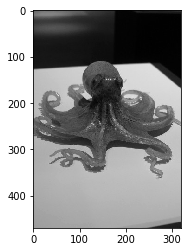

In [6]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)

plt.imshow(octo_front_gray, cmap='gray');

## （2）特征点提取

Here are what our SIFT features look like for the front-view octopus image:


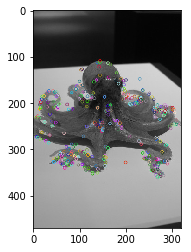

In [60]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc
def gen_sift_features1(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detect(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)



print ('Here are what our SIFT features look like for the front-view octopus image:')
show_sift_features(octo_front_gray, octo_front, octo_front_kp);

In [63]:
len(octo_front_kp)

346

In [64]:
octo_offset_kp = octo_offset_kp[0:346]

In [83]:
len(octo_offset_kp)
# 将特征点转换为i想同维度

346

## （3）特征点匹配

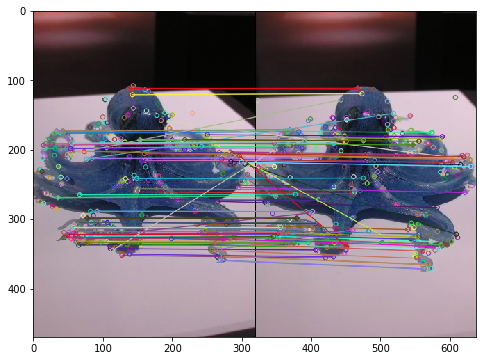

In [8]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);

In [16]:
def gen_sift_features1(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp = sift.detect(gray_img, None)
    return kp

In [17]:
octo_front_kp1 = gen_sift_features1(octo_front_gray)
octo_offset_kp1= gen_sift_features1(octo_offset_gray)

# 3、生成特征点二维坐标文件

In [67]:
for i in range(len(octo_front_kp)):
    tu = octo_front_kp[i].pt
    x = tu[0]
    y = tu[1]
    list_x.append(x)
    list_y.append(y)

In [68]:
# list_x

In [69]:
list = [list_x,list_y]

In [70]:
ans1 = np.array(list)

In [71]:
ans1.shape

(2, 346)

In [77]:
list_x = []
list_y = []

In [78]:
for i in range(len(octo_offset_kp)):
    tu = octo_offset_kp[i].pt
    x = tu[0]
    y = tu[1]
    list_x.append(x)
    list_y.append(y)

In [79]:
list = [list_x,list_y]

In [80]:
ans2 = np.array(list)

In [81]:
ans2.shape

(2, 346)

In [82]:
np.savetxt("C:\\Users\\Tianh\\Desktop\\sift_data0.txt",ans1)
np.savetxt("C:\\Users\\Tianh\\Desktop\\sift_data1.txt",ans2)